<a href="https://colab.research.google.com/github/0yash4/Google-Colab/blob/main/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine(SVM)
## Classifier and Regressor


# Soft Margin SVM
### Using Gradient Descent with Hinge Loss
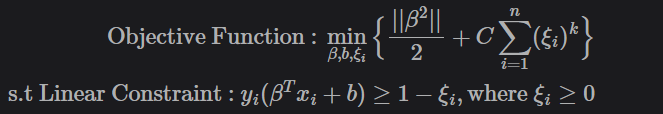

### Using Hinge Loss
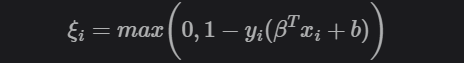

### Final Loss Function
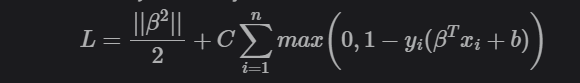

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [120]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

def plot_svm(X, y, w, b, title ='Plot for linear SVM'):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.title(title)
    plt.show()

In [128]:
class SVMUsingGradientDescent:
  def __init__(self, C=1.0):
    self.C = C
    self.beta = None
    self.b = None

  def __decision_function(self, X):
        return X.dot(self.beta) + self.b

  def __cost(self, margin):
        return (1 / 2) * self.beta.dot(self.beta) + self.C * np.sum(np.maximum(0, 1 - margin))

  def __margin(self, X, y):
        return y * self.__decision_function(X)

  def fit(self, X, y, learning_rate=0.01, epoch=1000):
    row, col = X.shape
    self.beta = np.zeros(X.shape[1], dtype = np.float64)
    self.b = 0
    margin = self.__margin(X, y)
    misclassified_index = np.where(margin < 1)[0]
    for _ in range(epoch):
      d_beta = self.beta - self.C * np.sum(y[misclassified_index].dot(X[misclassified_index]))
      self.beta = self.beta - learning_rate * d_beta
      d_b = -self.C * np.sum(y[misclassified_index])
      self.b = self.b - learning_rate * d_b

    return self.beta, self.b

  def predict(self, X):
    return np.sign(self.__decision_function(X))


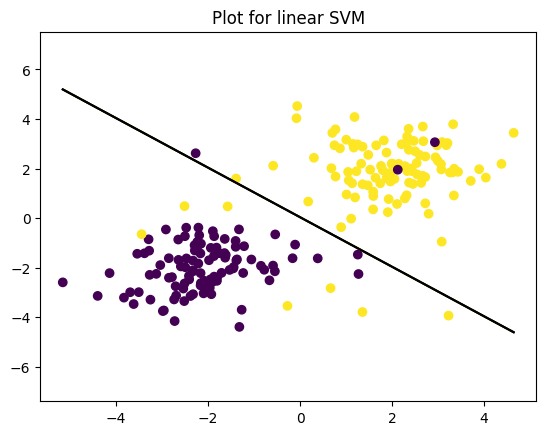

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def generate_svm_dataset_with_outliers(n_samples=200, n_features=2, noise=0.1, n_outliers=10, random_state=None):
    """
    Generate a dummy dataset for SVM testing with some outliers and boundary points.

    Parameters:
    - n_samples: Number of samples to generate
    - n_features: Number of features (default is 2 for easy visualization)
    - noise: Amount of noise to add to the dataset
    - n_outliers: Number of outlier points to add
    - random_state: Seed for random number generation

    Returns:
    - X: Feature matrix of shape (n_samples + n_outliers, n_features)
    - y: Target vector of shape (n_samples + n_outliers,)
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Generate main cluster centers
    center1 = np.array([2, 2])
    center2 = np.array([-2, -2])

    # Generate samples for each class
    X1 = np.random.randn(n_samples // 2, n_features) + center1
    X2 = np.random.randn(n_samples - n_samples // 2, n_features) + center2

    # Combine samples and create labels
    X = np.vstack((X1, X2))
    y = np.hstack((np.ones(n_samples // 2), -np.ones(n_samples - n_samples // 2)))

    # Add some noise
    X += noise * np.random.randn(*X.shape)

    # Generate outliers
    outliers_X = np.random.uniform(low=-4, high=4, size=(n_outliers, n_features))
    outliers_y = np.random.choice([-1, 1], size=n_outliers)

    # Add outliers to the opposite classes
    outliers_y = -np.sign(outliers_X[:, 0] + outliers_X[:, 1])

    # Combine main data with outliers
    X = np.vstack((X, outliers_X))
    y = np.hstack((y, outliers_y))

    return X, y

X, y = generate_svm_dataset_with_outliers()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
svm = SVMUsingGradientDescent()

beta, b = svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
plot_svm(X, y, beta, b)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict, normalize=False)


66

In [131]:
from sklearn.svm import LinearSVC
svm1 = LinearSVC(random_state=0, tol=1e-5)
svm1.fit(X_train, y_train)
y_predict1 = svm1.predict(X_test)
accuracy_score(y_test, y_predict1, normalize=False)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


67

# Soft Margin SVM
### Using Lagrange Multiplier